In [14]:
# Defines
#=================================================#
IS_TRAIN_NOT_TEST = True

ENV_LOCAL_MACHINE   = 1
ENV_GOOGLE_COLLABS  = 2
ENV_KAGGLE          = 3
ENVIRONMENT = ENV_LOCAL_MACHINE

#=================================================#
RANDOM_SEED = 214
OVERSAMPLING_RATIO = 0.3
UNDERSAMPLING_RATIO = 0.8
N_JOBS = -1

#=================================================#
PATH_INPUT              = "dataset/creditcard/"
PATH_OUTPUT             = "outputs/creditcard/"

CSV_DATASET_RAW         = "creditcard.csv"
CSV_DATASET_TRAIN       = "dataset_train.csv"
CSV_DATASET_TEST        = "dataset_test.csv"


if ENVIRONMENT == ENV_LOCAL_MACHINE:
    PATH_DATASET_BASE  = "../"
if ENVIRONMENT == ENV_GOOGLE_COLLABS:
    PATH_DATASET_BASE  = "drive/MyDrive/UTN_Finales/[F] Aprendizaje Automatico/Repositorio/"

FEATURE_TARGET = "Class"

In [15]:
# Import libraries
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt


In [16]:
# Parameter analyze
def analyze_nan_values(ds, param):
    print(f"NaN counts for '{param}': ", ds[param].isna().sum()+np.isinf(ds[param]).sum())

def analyze_value_counts(ds, param):
    value_counts = ds[param].value_counts()
    print(f"Value counts for '{param}': ", value_counts)
    return value_counts

# Parameter plot
def plot_histogram(ds, param, bins):
    sns.histplot(ds[param], bins = bins)
    plt.tight_layout()
    plt.title('Histogram Plot')
    plt.show()

def plot_bar(ds, param):
    category_counts = ds[param].value_counts()
    plt.figure(figsize=(8, 6))
    plt.bar(category_counts.index.astype(str), category_counts.values)
    plt.title('Bar Plot')
    plt.xlabel(param)
    plt.ylabel("Value Counts")
    plt.show()

def plot_correlation(ds, param, param_target):
    corr_matrix = ds[[param, param_target]].corr(numeric_only=True)
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.title('Correlation Matrix Plot')
    plt.show()

def plot_correlation_list(ds, param_list):
    corr_matrix = ds[param_list].corr(numeric_only=True)
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.title('Correlation Matrix Plot')
    plt.show()

def plot_scatter(ds, param, param_target):
    plt.scatter(ds[param], ds[param_target], color='blue', alpha=0.5)
    plt.grid(True)
    plt.title('Scatter Plot')
    plt.show()

def plot_violinPlot(ds, param, param_target):
    plt.figure(figsize=(8, 6))
    sns.violinplot(x=param, y=param_target, data=ds)
    plt.title('Violin Plot')
    plt.show()

In [17]:
# Import dataset
dataset = pd.read_csv(PATH_DATASET_BASE+PATH_OUTPUT+CSV_DATASET_TRAIN)
print("Dataset Size:", dataset.shape[0])
X_train = dataset.drop(FEATURE_TARGET, axis=1)
y_train = dataset[FEATURE_TARGET]

dataset.sample(3)

Dataset Size: 199364


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
75331,63697.0,-2.366678,0.472019,2.722296,3.351182,-0.773891,1.623187,-0.774336,0.634815,0.571032,...,-0.112871,0.377558,0.286434,0.089695,-0.104989,0.284245,-0.909212,-0.132332,20.52,0
198145,36186.0,1.383964,-0.636213,0.153734,-1.020878,-0.572071,0.037021,-0.720654,0.015904,-0.930940,...,0.104048,0.141400,-0.170438,-0.817826,0.492882,-0.232242,0.008095,0.005431,39.00,0
5779,64380.0,1.317952,0.009234,-0.140221,-0.751441,-0.384454,-1.377263,0.316665,-0.380908,1.076116,...,-0.012017,0.265350,-0.201863,0.451261,0.984823,-0.552215,0.041007,0.012779,1.00,0


Value counts for 'Class':  Class
0    199020
1       344
Name: count, dtype: int64


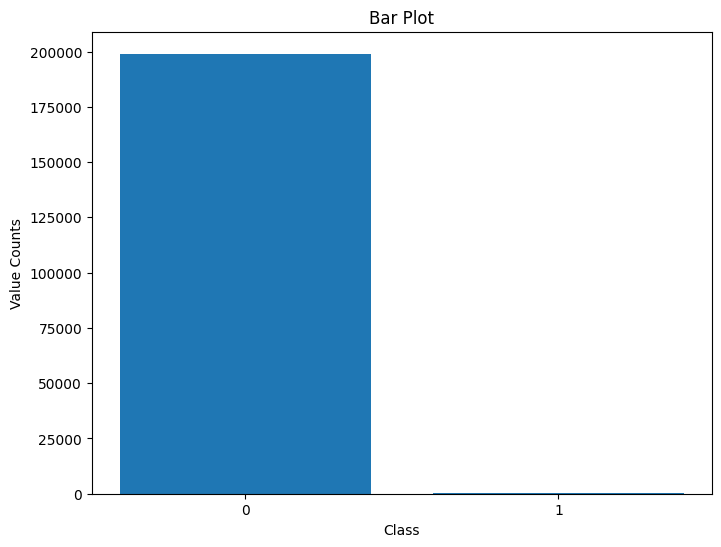

In [18]:
# Check data imbalance
parameter = FEATURE_TARGET
analyze_value_counts(dataset, parameter)
plot_bar(dataset, parameter)


In [19]:
# Check NaN values
for parameter in dataset.columns:
    analyze_nan_values(dataset, parameter)

NaN counts for 'Time':  0
NaN counts for 'V1':  0
NaN counts for 'V2':  0
NaN counts for 'V3':  0
NaN counts for 'V4':  0
NaN counts for 'V5':  0
NaN counts for 'V6':  0
NaN counts for 'V7':  0
NaN counts for 'V8':  0
NaN counts for 'V9':  0
NaN counts for 'V10':  0
NaN counts for 'V11':  0
NaN counts for 'V12':  0
NaN counts for 'V13':  0
NaN counts for 'V14':  0
NaN counts for 'V15':  0
NaN counts for 'V16':  0
NaN counts for 'V17':  0
NaN counts for 'V18':  0
NaN counts for 'V19':  0
NaN counts for 'V20':  0
NaN counts for 'V21':  0
NaN counts for 'V22':  0
NaN counts for 'V23':  0
NaN counts for 'V24':  0
NaN counts for 'V25':  0
NaN counts for 'V26':  0
NaN counts for 'V27':  0
NaN counts for 'V28':  0
NaN counts for 'Amount':  0
NaN counts for 'Class':  0


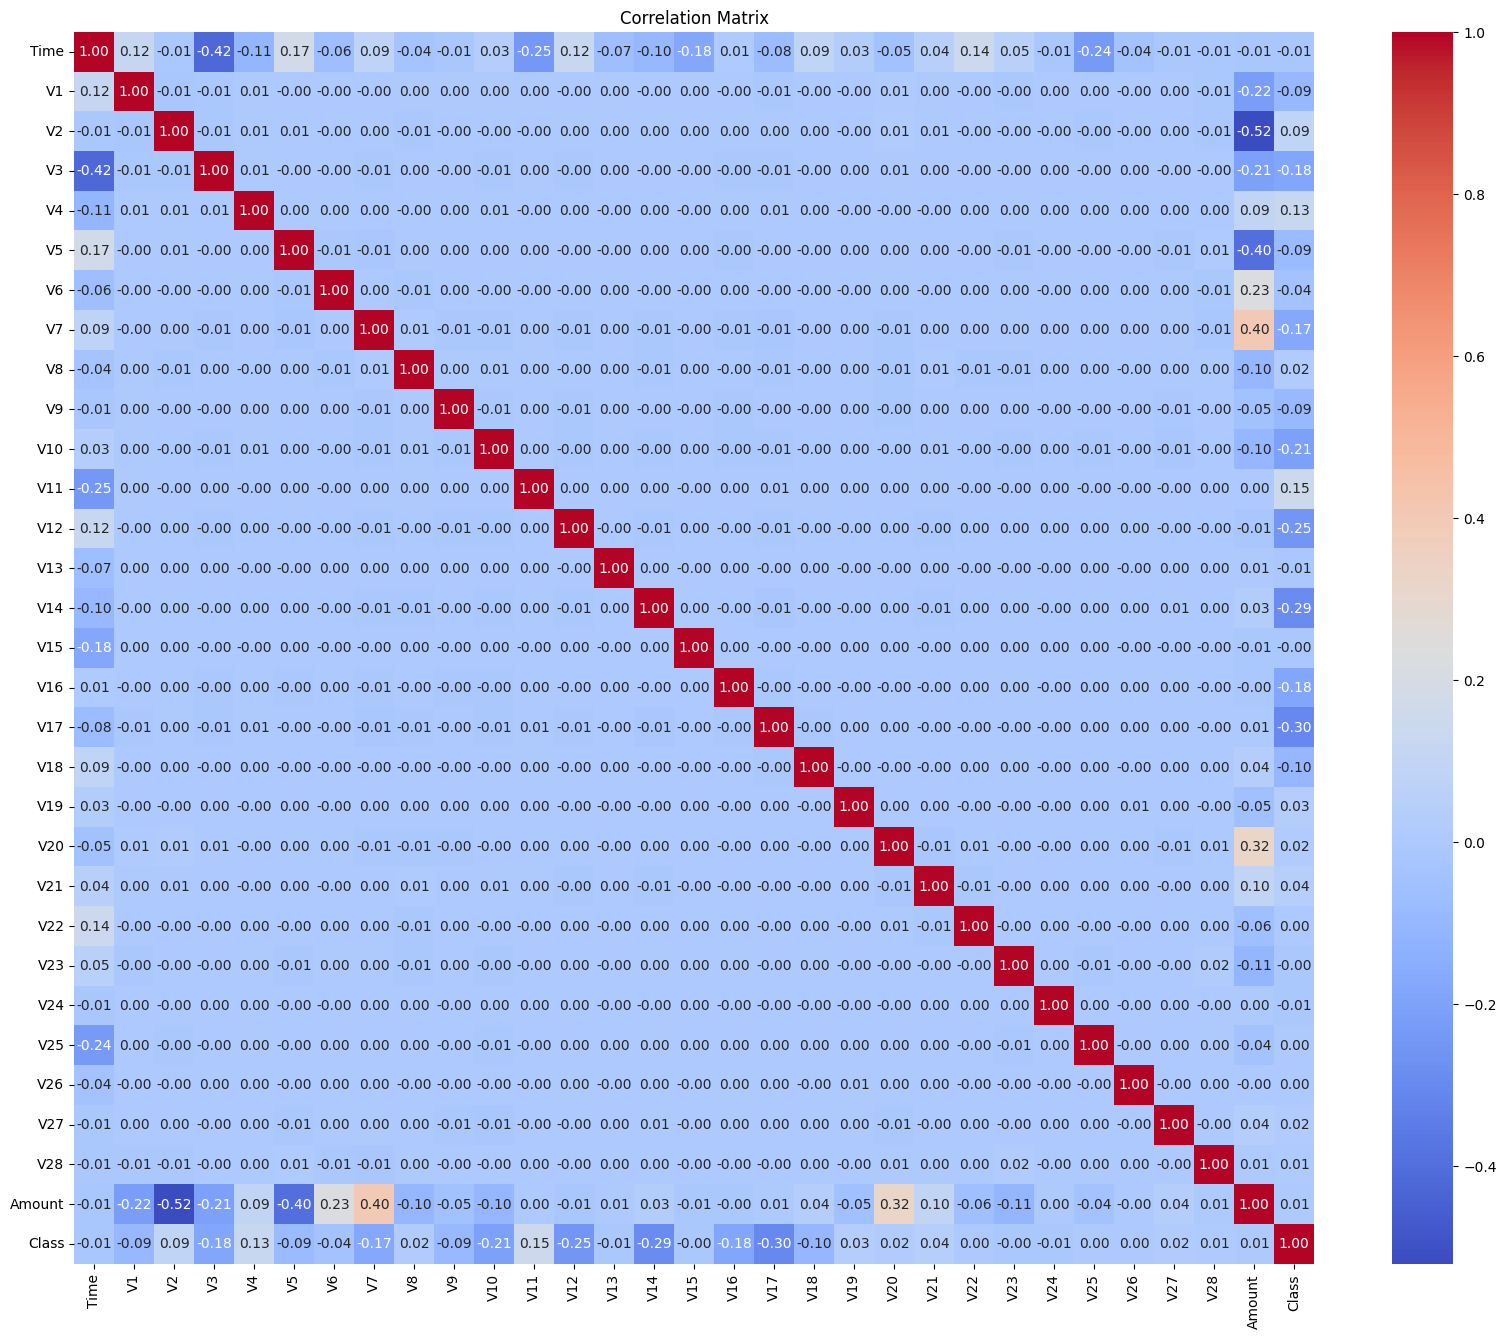

In [20]:
# Plot the correlation matrix
corr_matrix = dataset.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [21]:
feature_transformations = pd.DataFrame()

def getTransformationFeature(featureNames):
  #Transformaciones a realizar a cada feature
  transformations = ['none', 'exp', 'cbrt']
  # Las que me pueden llegar a dar inf o nan, no las hago:  'sqrt', 'log', 'reciprocal'
  for i in range(len(featureNames)):
    transformations_corr = list()

    if featureNames[i] in dataset.columns:
      #Realiza de forma autilizar las transformaciones
      feature_tr = dataset[featureNames[i]].transform([np.exp, np.cbrt])

      #Calcula la correlación con cada transformación
      transformations_corr.append(np.abs(pd.DataFrame([dataset[featureNames[i]], dataset[FEATURE_TARGET]]).T.corr()[FEATURE_TARGET][featureNames[i]]))
      for j in range(len(transformations)-1):
        transformations_corr.append(np.abs(pd.DataFrame([feature_tr[transformations[j+1]], dataset[FEATURE_TARGET]]).T.corr()[FEATURE_TARGET][transformations[j+1]]))
      
      #Indica cual es la mejor transformación para cada feature para lograr la mejor correlación
      transformation_index_best = transformations_corr.index(np.nanmax(transformations_corr))
      print(transformations[transformation_index_best], 
            '(', 
            featureNames[i],
            '): %.3f'
            % transformations_corr[transformation_index_best])

      #Transforma efectivamente el feature con la mejor transformación
      if(transformation_index_best == 1):
        dataset[featureNames[i]] = np.exp(dataset[featureNames[i]])
      elif(transformation_index_best == 2):
        dataset[featureNames[i]] = np.cbrt(dataset[featureNames[i]])

      global feature_transformations
      #Guarda la transformación hecha en un dataframe
      if featureNames[i] in feature_transformations.columns:
        feature_transformations = feature_transformations.drop(featureNames[i] , axis = 1)
      
      feature_transformations[featureNames[i]] = [transformations[transformation_index_best]]



In [22]:
getTransformationFeature(X_train.columns)

cbrt ( Time ): 0.011
none ( V1 ): 0.095
none ( V2 ): 0.088
none ( V3 ): 0.182
none ( V4 ): 0.127
none ( V5 ): 0.086
none ( V6 ): 0.042
none ( V7 ): 0.173
exp ( V8 ): 0.086
none ( V9 ): 0.090
none ( V10 ): 0.206
exp ( V11 ): 0.163
none ( V12 ): 0.248
none ( V13 ): 0.005
none ( V14 ): 0.292
none ( V15 ): 0.004
none ( V16 ): 0.185
none ( V17 ): 0.304
none ( V18 ): 0.101
exp ( V19 ): 0.084
cbrt ( V20 ): 0.022
exp ( V21 ): 0.108
exp ( V22 ): 0.013
none ( V23 ): 0.005
cbrt ( V24 ): 0.008
cbrt ( V25 ): 0.004
none ( V26 ): 0.002
cbrt ( V27 ): 0.026
cbrt ( V28 ): 0.018
none ( Amount ): 0.006


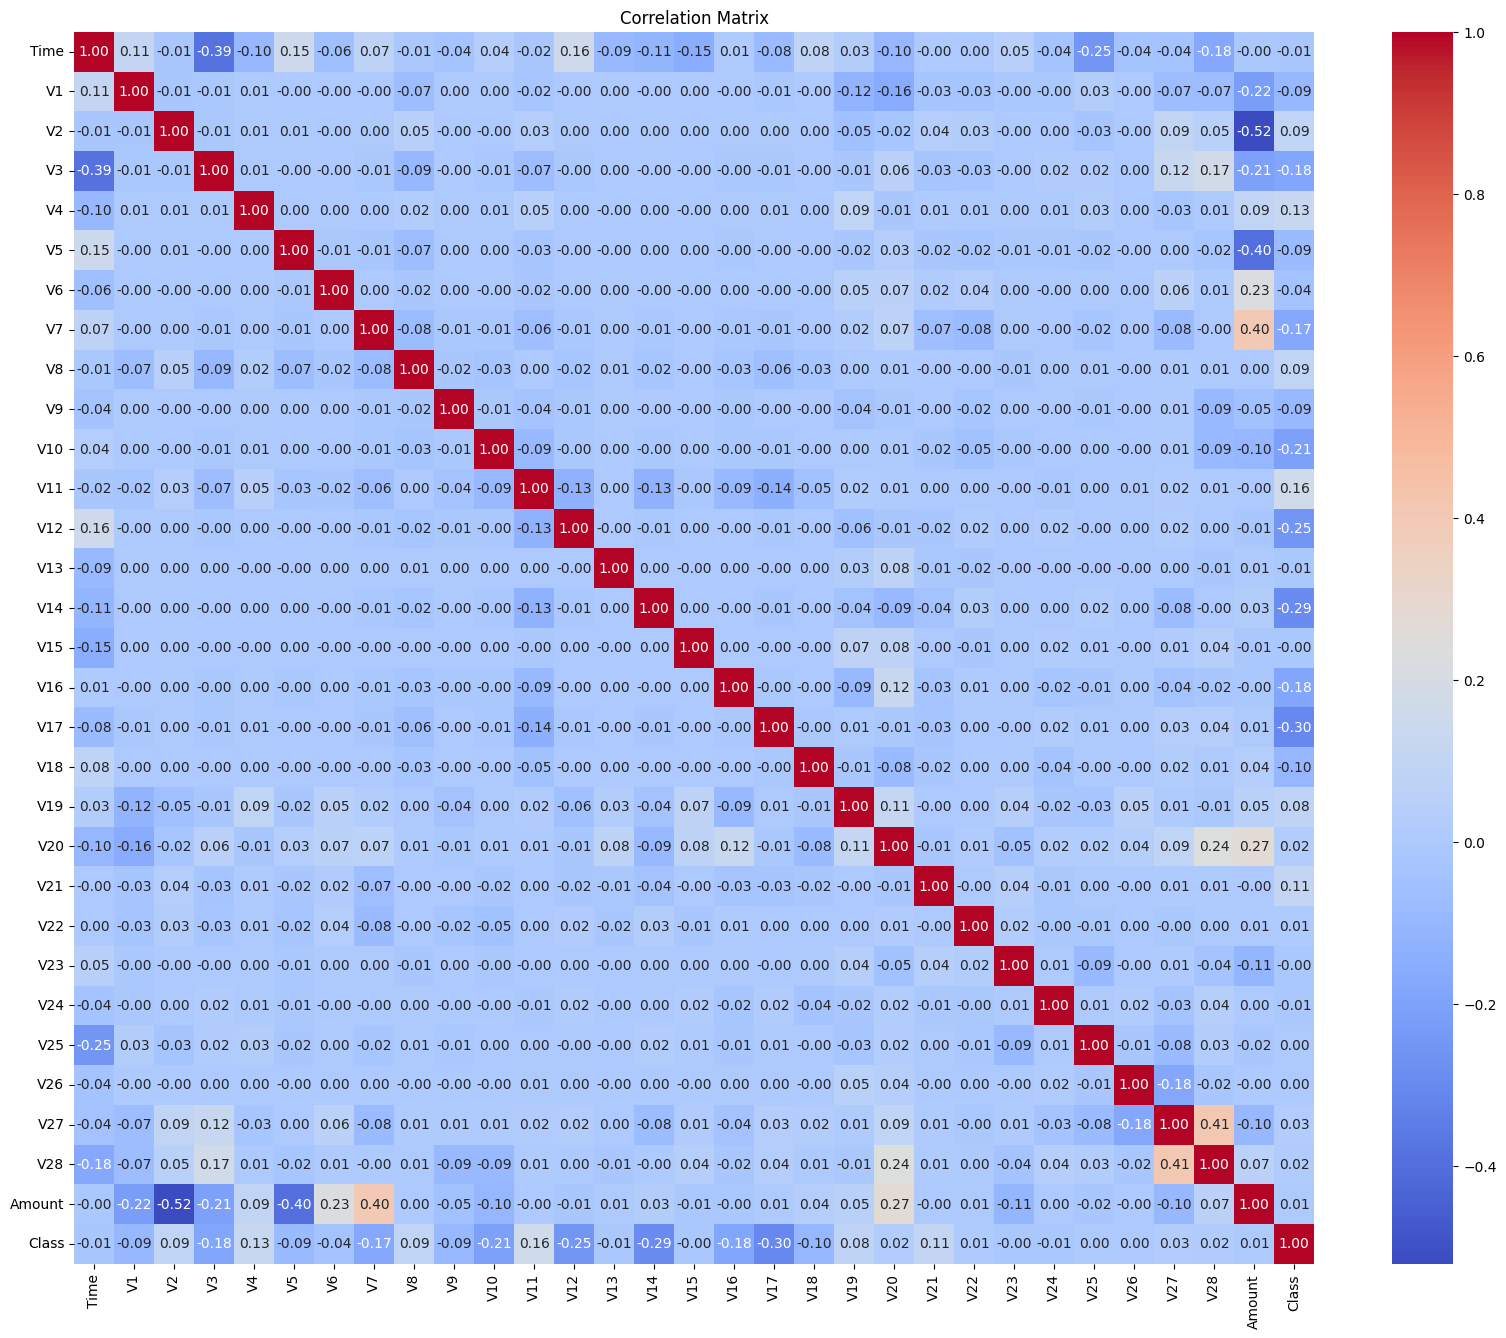

In [23]:
# Get new corr after transforming
corr_matrix = dataset.corr()

# Optionally, plot the correlation matrix
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

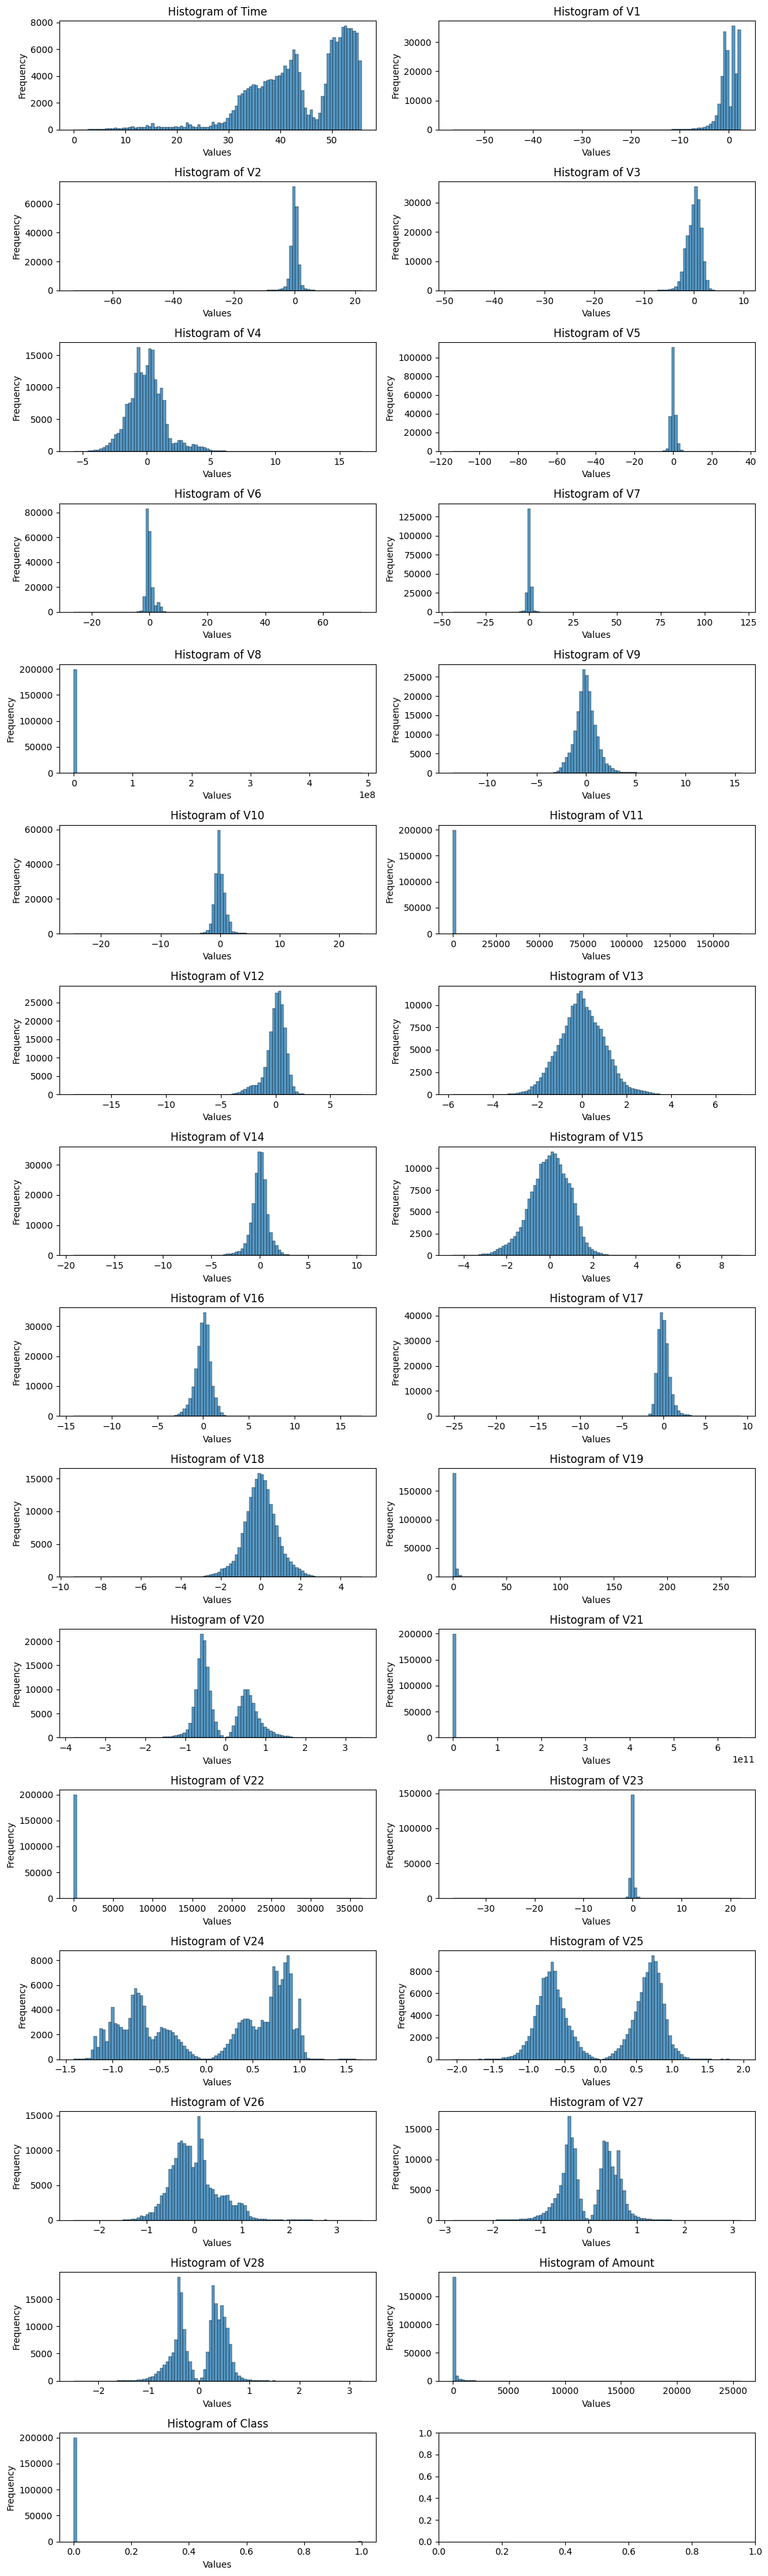

In [24]:
# Determine the number of rows and columns for subplots
num_cols = len(dataset.columns)
num_rows = int(np.ceil(num_cols / 2))  # Adjust as needed for your dataset

# Create subplots
fig, axs = plt.subplots(num_rows, 2, figsize=(12, 2.5 * num_rows))

# Flatten the axs array in case num_rows = 1
axs = axs.flatten()

for i, param in enumerate(dataset.columns):
    sns.histplot(dataset[param], bins=100, ax=axs[i])
    axs[i].set_title(f'Histogram of {param}')
    axs[i].set_xlabel('Values')
    axs[i].set_ylabel('Frequency')

# Adjust layout and display
plt.tight_layout()
plt.show()